In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [16]:
df=pd.read_csv("sat1.csv")
df.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [17]:
x=df['high_GPA']
y=df['univ_GPA']
cd=df[['high_GPA','univ_GPA']]
print(cd)

     high_GPA  univ_GPA
0        3.45      3.52
1        2.78      2.91
2        2.52      2.40
3        3.67      3.47
4        3.24      3.47
5        2.10      2.37
6        2.82      2.40
7        2.36      2.24
8        2.42      3.02
9        3.51      3.32
10       3.48      3.59
11       2.14      2.54
12       2.59      3.19
13       3.46      3.71
14       3.51      3.58
15       3.68      3.40
16       3.91      3.73
17       3.72      3.49
18       2.15      2.25
19       2.48      2.37
20       3.09      3.29
21       2.71      3.19
22       2.46      3.28
23       3.32      3.37
24       3.61      3.61
25       3.82      3.81
26       2.64      2.40
27       2.19      2.21
28       3.34      3.58
29       3.48      3.51
..        ...       ...
75       3.62      3.51
76       2.92      3.17
77       2.81      3.20
78       3.11      3.41
79       3.28      3.29
80       2.70      3.17
81       2.62      3.12
82       3.72      3.71
83       3.42      3.50
84       3.51   

[]

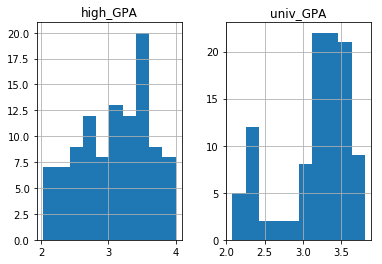

In [18]:
cd.hist()
plt.plot()

[]

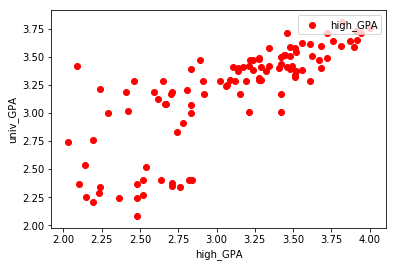

In [19]:
plt.scatter(x,y,color='r')

plt.xlabel("high_GPA")
plt.ylabel("univ_GPA")
plt.legend(['high_GPA','univ_GPA'],loc=1)
plt.plot()

In [20]:
ms=np.random.rand(len(df))<0.8
train=cd[ms]
test=cd[~ms]
test.high_GPA

0     3.45
1     2.78
10    3.48
11    2.14
14    3.51
15    3.68
18    2.15
43    2.83
49    3.34
54    2.24
60    2.67
61    3.24
63    3.87
68    3.29
69    3.41
77    2.81
87    3.90
89    2.83
97    3.19
Name: high_GPA, dtype: float64

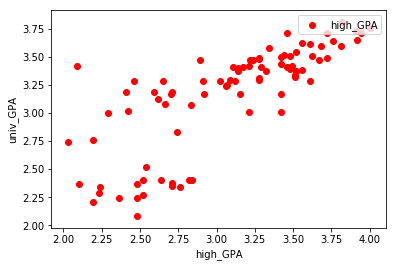

In [21]:
plt.scatter(train.high_GPA,train.univ_GPA,color='red')
plt.xlabel("high_GPA")
plt.ylabel("univ_GPA")
plt.legend(['high_GPA','univ_GPA'],loc=1)
plt.show()

In [22]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['high_GPA']])
train_y=np.asanyarray(train[['univ_GPA']])
reg.fit(train_x,train_y)
print('slope:',reg.coef_)
print('intercept:',reg.intercept_)

slope: [[0.69826336]]
intercept: [1.01153299]


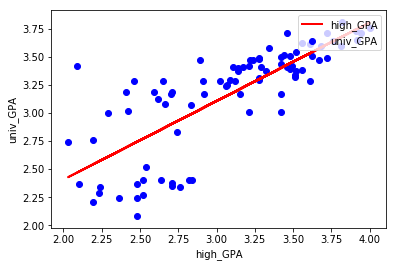

In [23]:
plt.scatter(train_x,train_y,color='blue')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'r-',linewidth=2)
plt.xlabel("high_GPA")
plt.ylabel("univ_GPA")
plt.legend(['high_GPA','univ_GPA'],loc=1)
plt.show()

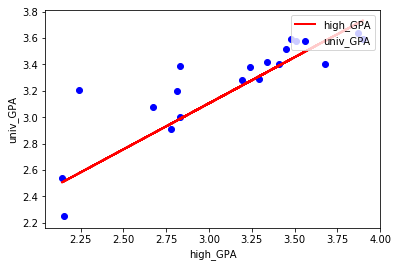

In [24]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['high_GPA']])
test_y=np.asanyarray(test[['univ_GPA']])
test_y_=reg.predict(test_x)
plt.scatter(test_x,test_y,color='blue')
plt.plot(test_x,test_y_,'r-',linewidth=2)
plt.xlabel("high_GPA")
plt.ylabel("univ_GPA")
plt.legend(['high_GPA','univ_GPA'],loc=1)
plt.show()


In [25]:
print("Mean absolute error :%.2f"%np.mean(np.absolute(test_y-test_y_)))
print("residual sum of square:%.2f"%np.mean((test_y-test_y_)**2))
print("r2_sqauared:%.2f"%r2_score(test_y,test_y_))
print("score:%.2f"%reg.score(test_y,test_y_))

Mean absolute error :0.15
residual sum of square:0.04
r2_sqauared:0.64
score:0.61


In [28]:
num=0
den=0
mean_y=np.mean(test_y)
for i in range(len(test_y)):
    test_y_=reg.coef_[0][0]*test_x[i]+reg.intercept_[0]
    num+=(test_y[i]-mean_y)**2
    den+=(test_y[i]-test_y_)**2
cd=1-den/num
print(cd)

[0.64328605]
